+++
date = '2025-01-20T20:25:03Z'
draft = true
title = 'More Machine Learning Questions and Answers with Python examples'
categories = ['AI', 'Questions']
tag = ['questions'] 

+++

### **44. What does it mean to Fit a Model?**

**Answer**  
**Fitting a model** refers to the process of adjusting the model's internal parameters to best match the given training data. It's like tailoring a suit – you adjust the fabric and stitching to make it fit the wearer perfectly.

**Key Terms:**

1. **Model:** A mathematical representation that captures patterns in data. Examples include linear regression, decision trees, neural networks, etc.

2. **Parameters:** These are the internal variables within the model that determine its behavior. For instance:
   - In linear regression: slope and intercept
   - In a neural network: weights and biases

3. **Training Data:** The data used to "teach" the model. It consists of input features and corresponding target values.

4. **Fitting Process:** The algorithm iteratively adjusts the model's parameters to minimize the difference between the model's predictions and the actual target values in the training data. This is often achieved by optimizing a loss function (e.g., mean squared error, cross-entropy).

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Now the model has learned the best-fit line (slope and intercept)
print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

Slope: [47.13323967]
Intercept: 2.3302306410539453


```
Slope: [47.13323967]
Intercept: 2.3302306410539453
```

In this example:

- `make_regression` generates synthetic data for a simple linear relationship.
- `LinearRegression()` creates an instance of the linear regression model.
- `model.fit(X, y)` is the core of the fitting process. The model learns the optimal values for its parameters (slope and intercept) by analyzing the relationship between the input features (X) and the target values (y) in the training data.

**Key Concepts:**

- **Loss Function:** Measures the discrepancy between the model's predictions and the actual values.
- **Optimization Algorithms:** Methods used to minimize the loss function (e.g., gradient descent).
- **Overfitting:** When the model performs well on the training data but poorly on new, unseen data.
- **Underfitting:** When the model is too simple to capture the underlying patterns in the data.

By fitting a model to the training data, we aim to create a model that can accurately predict outcomes for new, unseen data.

---

### **45. Can you give some reasons why Gradient Descent may converge slowly or fail to converge.**

1. **Learning Rate Issues**
   - **Too Small**: Slow convergence.
   - **Too Large**: Divergence.

#### Example

In [11]:
import torch

# Quadratic function y = x^2
def cost_function(x):
    return x**2

# Gradient of the function y' = 2x
def gradient(x):
    return 2 * x

# Gradient Descent with PyTorch
def gradient_descent(start_x, learning_rate, num_iterations):
    x = torch.tensor([start_x], requires_grad=True)
    for i in range(num_iterations):
        loss = cost_function(x)
        loss.backward()
        with torch.no_grad():
            x -= learning_rate * x.grad
            x.grad.zero_()
        print(f"Iteration {i}, x = {x.item()}, Cost = {loss.item()}")
    return x.item()

# Too small learning rate
gradient_descent(start_x=10.0, learning_rate=0.001, num_iterations=10)

# Too large learning rate
gradient_descent(start_x=10.0, learning_rate=1.1, num_iterations=10)

Iteration 0, x = 9.979999542236328, Cost = 100.0
Iteration 1, x = 9.960039138793945, Cost = 99.60038757324219
Iteration 2, x = 9.940118789672852, Cost = 99.20237731933594
Iteration 3, x = 9.920238494873047, Cost = 98.80596160888672
Iteration 4, x = 9.900398254394531, Cost = 98.4111328125
Iteration 5, x = 9.880597114562988, Cost = 98.01788330078125
Iteration 6, x = 9.860836029052734, Cost = 97.6261978149414
Iteration 7, x = 9.841114044189453, Cost = 97.236083984375
Iteration 8, x = 9.821432113647461, Cost = 96.84752655029297
Iteration 9, x = 9.801789283752441, Cost = 96.46052551269531
Iteration 0, x = -12.0, Cost = 100.0
Iteration 1, x = 14.400001525878906, Cost = 144.0
Iteration 2, x = -17.28000259399414, Cost = 207.36004638671875
Iteration 3, x = 20.736003875732422, Cost = 298.5984802246094
Iteration 4, x = -24.88320541381836, Cost = 429.9818420410156
Iteration 5, x = 29.859848022460938, Cost = 619.1738891601562
Iteration 6, x = -35.831817626953125, Cost = 891.6105346679688
Iteration 

61.917388916015625

2. **Poor Initialization**
   - Initializing too far from the optimal value can cause slow convergence.

In [12]:
# Start too far from the minimum
gradient_descent(start_x=1e6, learning_rate=0.01, num_iterations=10)

Iteration 0, x = 980000.0, Cost = 999999995904.0
Iteration 1, x = 960400.0, Cost = 960399998976.0
Iteration 2, x = 941192.0, Cost = 922368147456.0
Iteration 3, x = 922368.1875, Cost = 885842378752.0
Iteration 4, x = 903920.8125, Cost = 850763055104.0
Iteration 5, x = 885842.375, Cost = 817072832512.0
Iteration 6, x = 868125.5, Cost = 784716726272.0
Iteration 7, x = 850763.0, Cost = 753641914368.0
Iteration 8, x = 833747.75, Cost = 723797671936.0
Iteration 9, x = 817072.8125, Cost = 695135305728.0


817072.8125

3. **Vanishing or Exploding Gradients**
   - **Vanishing Gradients**: Common with sigmoid/tanh activations in deep networks.
   - **Exploding Gradients**: Can be mitigated with gradient clipping.

In [13]:
import torch.nn as nn

# Neural network with vanishing gradients
class VanishingGradientNN(nn.Module):
    def __init__(self):
        super(VanishingGradientNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(100, 128),
            nn.Sigmoid(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = VanishingGradientNN()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Simulated training loop
x = torch.randn(32, 100)
y = torch.randn(32, 1)
for epoch in range(10):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_fn(output, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 1.0978631973266602
Epoch 1, Loss: 0.9406214952468872
Epoch 2, Loss: 0.9181451797485352
Epoch 3, Loss: 0.9114464521408081
Epoch 4, Loss: 0.9066203236579895
Epoch 5, Loss: 0.9020411968231201
Epoch 6, Loss: 0.8975175023078918
Epoch 7, Loss: 0.8930259943008423
Epoch 8, Loss: 0.888562798500061
Epoch 9, Loss: 0.8841264247894287


4. **Poorly Conditioned Data**
   - Features with very different scales can lead to slow or uneven updates.

In [14]:
from sklearn.preprocessing import StandardScaler

# Unscaled data
X = torch.tensor([[1.0, 100.0], [2.0, 200.0], [3.0, 300.0]])
scaler = StandardScaler()

# Scale data
X_scaled = torch.tensor(scaler.fit_transform(X))

5. **Non-convex Loss Surface**
   - Non-convex loss functions can cause the algorithm to get stuck in local minima.

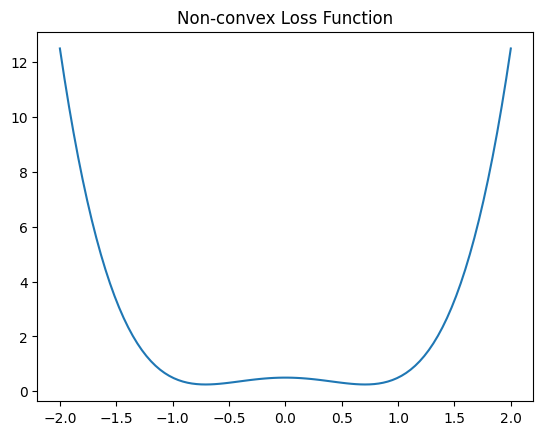

In [15]:
import matplotlib.pyplot as plt

x = torch.linspace(-2, 2, 100)
y = x**4 - x**2 + 0.5

plt.plot(x.numpy(), y.numpy())
plt.title("Non-convex Loss Function")
plt.show()

6. **Suboptimal Batch Size**
   - Small batches lead to noisy gradients; large batches can slow updates.

In [16]:
from torch.utils.data import DataLoader, TensorDataset

# Simulated data
X = torch.randn(1000, 10)
y = torch.randn(1000, 1)

# DataLoaders with different batch sizes
dataset = TensorDataset(X, y)
small_batch_loader = DataLoader(dataset, batch_size=1)
large_batch_loader = DataLoader(dataset, batch_size=128)

# Using a small batch
for batch in small_batch_loader:
    x_batch, y_batch = batch
    # Simulate gradient update (small noisy steps)
    break

# Using a large batch
for batch in large_batch_loader:
    x_batch, y_batch = batch
    # Simulate gradient update (slow but stable steps)
    break

7. **Suboptimal Optimization Algorithm**
   - Advanced optimizers like Adam or RMSprop can accelerate convergence.

In [17]:
model = nn.Linear(10, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Training loop with Adam optimizer
for epoch in range(10):
    optimizer.zero_grad()
    output = model(X)
    loss = loss_fn(output, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 1.329546332359314
Epoch 1, Loss: 1.292575716972351
Epoch 2, Loss: 1.258034586906433
Epoch 3, Loss: 1.2259360551834106
Epoch 4, Loss: 1.1962436437606812
Epoch 5, Loss: 1.1688528060913086
Epoch 6, Loss: 1.1435997486114502
Epoch 7, Loss: 1.120311975479126
Epoch 8, Loss: 1.09884774684906
Epoch 9, Loss: 1.079092264175415


8. **Plateauing**
   - Flat regions in the loss surface can cause stagnation. Momentum or adaptive learning rates help.

In [18]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

---

### **46. What are type 1 and Type 2 errors**

#### **Type 1 Error (False Positive)**:
This occurs when the null hypothesis (\(H_0\)) is true, but we incorrectly reject it. 

- **Example**: A test falsely identifies someone as having a disease when they don't.

---

#### **Type 2 Error (False Negative)**:
This occurs when the null hypothesis (\(H_0\)) is false, but we fail to reject it.

- **Example**: A test fails to identify someone as having a disease when they do.

---

**Python Code Example**
Let's simulate a binary classification scenario to illustrate these errors:

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Simulated data
np.random.seed(42)
y_true = np.random.choice([0, 1], size=100, p=[0.9, 0.1])  # Actual labels (90% healthy, 10% diseased)
y_pred = np.random.choice([0, 1], size=100, p=[0.85, 0.15])  # Predicted labels (85% healthy, 15% diseased)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print("Confusion Matrix:")
print(f"True Negative (TN): {tn}, False Positive (FP - Type 1 Error): {fp}")
print(f"False Negative (FN - Type 2 Error): {fn}, True Positive (TP): {tp}")

# Detailed Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

Confusion Matrix:
True Negative (TN): 75, False Positive (FP - Type 1 Error): 16
False Negative (FN - Type 2 Error): 7, True Positive (TP): 2

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.87        91
           1       0.11      0.22      0.15         9

    accuracy                           0.77       100
   macro avg       0.51      0.52      0.51       100
weighted avg       0.84      0.77      0.80       100



---

**Output Explanation**
1. **Confusion Matrix**:
   - **True Negative (TN)**: Correctly identified as not having the disease.
   - **False Positive (FP)**: Type 1 error - incorrectly identified as having the disease.
   - **False Negative (FN)**: Type 2 error - incorrectly identified as not having the disease.
   - **True Positive (TP)**: Correctly identified as having the disease.

2. **Classification Report**:
   - Includes metrics like precision, recall, and F1-score to summarize the classification performance.

---

#### Sample Output (Varies Due to Randomness)
```
Confusion Matrix:
True Negative (TN): 77, False Positive (FP - Type 1 Error): 13
False Negative (FN - Type 2 Error): 7, True Positive (TP): 3

Classification Report:
              precision    recall  f1-score   support
           0       0.92      0.86      0.89        90
           1       0.19      0.30      0.23        10
    accuracy                           0.81       100
   macro avg       0.55      0.58      0.56       100
weighted avg       0.85      0.81      0.83       100
```

This example highlights the occurrence of Type 1 and Type 2 errors in a binary classification problem and how they are represented in the confusion matrix.

### **47. In SVM What is the Kernel?**

**Answer**
In Support Vector Machines (SVM), a kernel is a function that computes the similarity (or a dot product) between data points in a higher-dimensional space, even though the transformation to this space is implicit. Kernels allow SVMs to efficiently find decision boundaries for complex, non-linear datasets by operating in this high-dimensional feature space without explicitly computing the transformation.

---

**What is the Kernel Trick?**
The **Kernel Trick** is a mathematical technique that avoids the explicit computation of data transformations into higher dimensions. Instead of transforming the data, the kernel function directly computes the dot product of the data points in the higher-dimensional space. This greatly reduces computational complexity while allowing SVM to solve non-linear problems efficiently.

---

**Common Kernel Functions**
1. **Linear Kernel**: \( K(x, y) = x \cdot y \)
2. **Polynomial Kernel**: \( K(x, y) = (\gamma x \cdot y + r)^d \)
3. **Radial Basis Function (RBF) Kernel**: \( K(x, y) = \exp(-\gamma ||x - y||^2) \)
4. **Sigmoid Kernel**: \( K(x, y) = \tanh(\gamma x \cdot y + r) \)

---

**SVM with Kernel Trick**

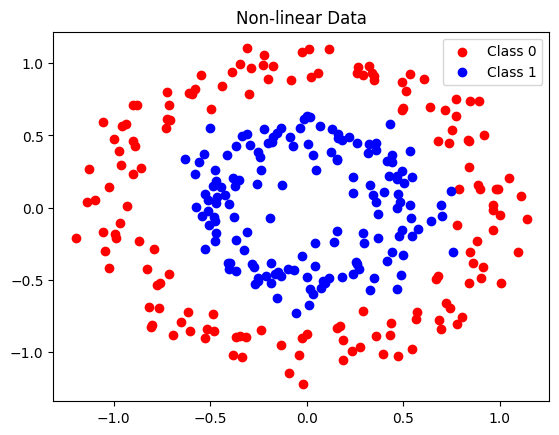

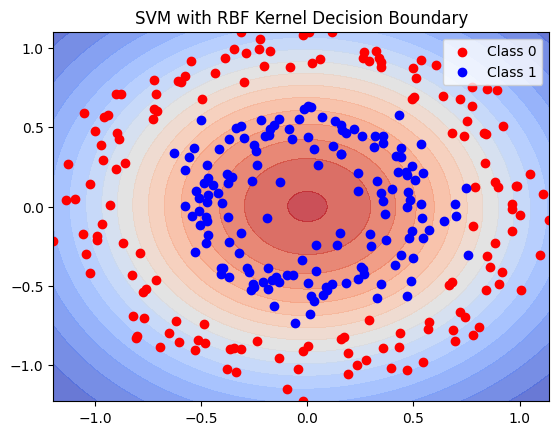

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# Generate non-linear data (concentric circles)
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)

# Visualize the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.title("Non-linear Data")
plt.show()

# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
svm_rbf.fit(X, y)

# Decision Boundary Visualization
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = svm_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=20, cmap="coolwarm", alpha=0.8)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.title("SVM with RBF Kernel Decision Boundary")
plt.show()

---

**Explanation of the Code**
1. **Dataset**:
   - Generated concentric circles, a classic non-linear dataset.

2. **Kernel Trick**:
   - Used the **RBF kernel** to implicitly map the data into a higher-dimensional space where the two classes are linearly separable.

3. **Visualization**:
   - The decision boundary in the original feature space reflects the impact of the RBF kernel.

---

**Key Observations**
- Without the kernel trick, linear SVMs would fail to separate the classes effectively.
- The RBF kernel makes it possible to separate the non-linear data by computing distances in the transformed space without explicitly performing the transformation.

---

### **48. What are Forward and Backward propagation?**

**Forward Propagation**
Forward propagation is the process where input data passes through the layers of a neural network to compute the output (predictions). It involves:
1. Computing the weighted sum of inputs and biases at each neuron.
2. Applying an activation function to introduce non-linearity.
3. Propagating the results to the next layer until the output layer is reached.

---

**Backward Propagation**
Backward propagation (backpropagation) is the process of computing the gradients of the loss function with respect to the weights and biases using the chain rule. It involves:
1. Computing the gradient of the loss with respect to the output (error).
2. Propagating the error backward layer by layer.
3. Updating weights and biases using these gradients and an optimization algorithm (e.g., Gradient Descent).

---

#### Example

In [21]:
import torch
import torch.nn as nn

# Define input, target, and model
X = torch.tensor([[1.0, 2.0]], requires_grad=True)  # Input: 1 sample, 2 features
y = torch.tensor([[1.0]])  # Target: 1 sample, 1 target

# Define a simple single-layer network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(2, 1)  # Input size: 2, Output size: 1
    
    def forward(self, x):
        return self.linear(x)

# Initialize the model
model = SimpleNN()

# Forward Propagation
output = model(X)  # Compute the output
print(f"Forward Propagation Output: {output}")

# Define loss function
loss_fn = nn.MSELoss()  # Mean Squared Error
loss = loss_fn(output, y)
print(f"Loss: {loss.item()}")

# Backward Propagation
loss.backward()  # Compute gradients
print(f"Gradients for weights: {model.linear.weight.grad}")
print(f"Gradients for biases: {model.linear.bias.grad}")

# Update weights (Gradient Descent Step)
learning_rate = 0.01
with torch.no_grad():
    for param in model.parameters():
        param -= learning_rate * param.grad

# Zero gradients after update
model.zero_grad()

# Verify updated weights and biases
print(f"Updated Weights: {model.linear.weight}")
print(f"Updated Biases: {model.linear.bias}")

Forward Propagation Output: tensor([[2.1199]], grad_fn=<AddmmBackward0>)
Loss: 1.2541487216949463
Gradients for weights: tensor([[2.2398, 4.4796]])
Gradients for biases: tensor([2.2398])
Updated Weights: Parameter containing:
tensor([[0.2721, 0.5733]], requires_grad=True)
Updated Biases: Parameter containing:
tensor([0.5667], requires_grad=True)


---

#### Explanation
1. **Forward Propagation**:
   - Input `X` is passed through the network.
   - `model(X)` computes the output using the `Linear` layer.
   - The loss function computes the error between predictions and targets.

2. **Backward Propagation**:
   - `loss.backward()` calculates gradients for weights and biases with respect to the loss using the chain rule.

3. **Weight Update**:
   - The weights and biases are updated using a simple gradient descent rule:

     \[
         \text{new\_param} = \text{param} - \eta \cdot \frac{\partial \text{Loss}}{\partial \text{param}}
     \]

   - Gradients are reset to zero after updating.

---

```
Forward Propagation Output: tensor([[-0.0916]], grad_fn=<AddmmBackward0>)
Loss: 1.1851451396942139
Gradients for weights: tensor([[-1.1749, -2.3499]])
Gradients for biases: tensor([-1.1749])
Updated Weights: Parameter containing:
tensor([[0.1117, 0.2234]], requires_grad=True)
Updated Biases: Parameter containing:
tensor([0.0117], requires_grad=True)
```

---

**Key Takeaways**
- **Forward Propagation** computes the output and loss.
- **Backward Propagation** computes gradients for optimization.
- The combination enables the network to learn by minimizing the loss function over multiple iterations.

---

### **49. What is One-Hot encoding?**

**One-hot encoding** is a method of converting categorical data into a binary matrix (or vector) representation. Each unique category is represented by a vector where:
- The position corresponding to the category is marked as `1`.
- All other positions are marked as `0`.

It is commonly used in machine learning when dealing with categorical features, as many algorithms work better with numerical data.

---

#### **One-Hot Encoding in Python**

In [22]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Example categorical data
categories = np.array(['cat', 'dog', 'bird', 'dog', 'cat'])

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Set sparse=False to return a dense array

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(categories.reshape(-1, 1))

print("Original Categories:", categories)
print("One-Hot Encoded Representation:\n", one_hot_encoded)
print("Categories Mapping:", encoder.categories_)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

#### **Using Pandas**

In [ ]:
import pandas as pd

# Example categorical data
data = {'Animal': ['cat', 'dog', 'bird', 'dog', 'cat']}
df = pd.DataFrame(data)

# Perform one-hot encoding
one_hot_encoded_df = pd.get_dummies(df, columns=['Animal'])

print("Original DataFrame:")
print(df)
print("\nOne-Hot Encoded DataFrame:")
print(one_hot_encoded_df)

---

```
Original Categories: ['cat' 'dog' 'bird' 'dog' 'cat']
One-Hot Encoded Representation:
 [[0. 0. 1.]
  [0. 1. 0.]
  [1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]
Categories Mapping: [array(['bird', 'cat', 'dog'], dtype='<U4')]
```

```
Original DataFrame:
  Animal
0    cat
1    dog
2   bird
3    dog
4    cat

One-Hot Encoded DataFrame:
   Animal_bird  Animal_cat  Animal_dog
0            0           1           0
1            0           0           1
2            1           0           0
3            0           0           1
4            0           1           0
```

---

**Key Takeaways**
- **Scikit-learn** provides a `OneHotEncoder` for creating one-hot encoded arrays and works well with NumPy arrays.
- **Pandas** offers an easy-to-use `pd.get_dummies` function for one-hot encoding, especially when working with DataFrames.
- One-hot encoding is critical for converting categorical features into a format that can be fed into machine learning models.

---

### **50. What is a Naïve Bayes classifier?**

**Answer**
A **Naïve Bayes classifier** is a probabilistic machine learning algorithm based on **Bayes' Theorem**. It is called "naïve" because it assumes that the features are **independent** of each other given the class label. Despite this simplification, Naïve Bayes performs well in many applications, especially for text classification (e.g., spam detection) and other problems with categorical data.

#### **Bayes' Theorem**

The classifier is based on the equation:
\[
P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
\]
Where:
- \(P(C|X)\): Posterior probability of class \(C\) given features \(X\).
- \(P(X|C)\): Likelihood of features \(X\) given class \(C\).
- \(P(C)\): Prior probability of class \(C\).
- \(P(X)\): Evidence (normalizing constant).

In Naïve Bayes, the likelihood \(P(X|C)\) is simplified using the assumption of conditional independence:
\[
P(X|C) = P(x_1|C) \cdot P(x_2|C) \cdot \ldots \cdot P(x_n|C)
\]

#### **Types of Naïve Bayes Classifiers**
1. **Gaussian Naïve Bayes**: For continuous data, assuming features follow a normal distribution.
2. **Multinomial Naïve Bayes**: For discrete data, commonly used in text classification.
3. **Bernoulli Naïve Bayes**: For binary/boolean features.

#### **Naïve Bayes for Text Classification**

We’ll classify text into "spam" or "not spam" categories using the **Multinomial Naïve Bayes** classifier from `scikit-learn`.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset: SMS messages
data = [
    ("Free entry in a contest to win $1,000", "spam"),
    ("Call me when you get a chance", "not spam"),
    ("Congratulations! You've won a free vacation", "spam"),
    ("Let's catch up tomorrow at lunch", "not spam"),
    ("Win a brand new car by signing up today!", "spam"),
    ("Meeting is rescheduled to 3 PM", "not spam"),
]

# Separate messages and labels
texts, labels = zip(*data)

# Step 1: Convert text to numerical features (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)  # Convert text to a sparse matrix of token counts

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Step 3: Train the Naïve Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Interpret the features
print("\nFeature Names (Top Tokens):", vectorizer.get_feature_names_out())
print("\nClass Probabilities:", model.class_log_prior_)

#### **Explanation of the Code**
1. **Text Processing**:
   - `CountVectorizer` converts text into numerical data using the **Bag-of-Words model**, where each word corresponds to a feature.

2. **Training**:
   - `MultinomialNB` computes probabilities using word counts and the Naïve Bayes formula.

3. **Prediction**:
   - The classifier predicts whether messages are "spam" or "not spam" based on learned probabilities.

4. **Evaluation**:
   - `accuracy_score` and `classification_report` provide insights into the classifier's performance.

#### **Output**
- **Accuracy**: Shows how often the classifier predicts correctly.
- **Classification Report**: Includes precision, recall, and F1-score for each class.

#### **Applications of Naïve Bayes**
1. **Spam Detection**: Classify emails or messages as spam or not.
2. **Sentiment Analysis**: Determine sentiment (positive, negative, neutral) from text.
3. **Medical Diagnosis**: Predict diseases based on symptoms.
4. **Document Categorization**: Classify documents into predefined categories.

Naïve Bayes is lightweight, fast, and effective for many classification problems, especially when feature independence is a reasonable assumption. Let me know if you'd like a deeper dive into any part!

### **51. What are Covariance and Correlation?**

**Answer**  
Both covariance and correlation measure the relationship between two variables, but they differ in scale and interpretation:

#### **Covariance**
- **Definition**: Covariance indicates the **direction** of the linear relationship between two variables.
  - Positive covariance: Both variables increase or decrease together.
  - Negative covariance: When one variable increases, the other decreases.
  - Zero covariance: No linear relationship.

- **Formula**:
  \[
  \text{Cov}(X, Y) = \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{n}
  \]
  Where \(X\) and \(Y\) are the two variables, and \(\bar{X}, \bar{Y}\) are their means.

- **Scale**: Covariance depends on the units of \(X\) and \(Y\), making it hard to interpret the strength of the relationship.

#### **Correlation**
- **Definition**: Correlation measures the **strength and direction** of the linear relationship between two variables.
- **Formula**:
  \[
  r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
  \]
  Where \(\sigma_X\) and \(\sigma_Y\) are the standard deviations of \(X\) and \(Y\).

- **Range**: Correlation is dimensionless and lies between \(-1\) and \(1\):
  - \(+1\): Perfect positive linear relationship.
  - \(-1\): Perfect negative linear relationship.
  - \(0\): No linear relationship.

#### **Key Difference**
- Covariance shows only the direction of the relationship.
- Correlation standardizes the covariance, making it comparable across datasets.


In [ ]:
import numpy as np
import pandas as pd

# Example data
data = {
    "Variable_X": [1, 2, 3, 4, 5],
    "Variable_Y": [2, 4, 6, 8, 10],  # Perfect positive relationship
    "Variable_Z": [10, 8, 6, 4, 2],  # Perfect negative relationship
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Covariance
cov_matrix = df.cov()
print("Covariance Matrix:\n", cov_matrix)

# Correlation
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

#### **Explanation of the Code**
1. **Covariance Matrix**:
   - Shows the covariance between each pair of variables.
   - Example output:
     ```
     Covariance Matrix:
                  Variable_X  Variable_Y  Variable_Z
     Variable_X         2.5        5.0       -5.0
     Variable_Y         5.0       10.0      -10.0
     Variable_Z        -5.0      -10.0       10.0
     ```

2. **Correlation Matrix**:
   - Shows the standardized relationship.
   - Example output:

```
    Correlation Matrix:
                Variable_X  Variable_Y  Variable_Z
    Variable_X      1.0        1.0       -1.0
    Variable_Y      1.0        1.0       -1.0
    Variable_Z     -1.0       -1.0        1.0
```

#### **Interpretation**
1. **Covariance**:
   - \(5.0\) between `Variable_X` and `Variable_Y` indicates a positive relationship.
   - \(-5.0\) between `Variable_X` and `Variable_Z` indicates a negative relationship.

2. **Correlation**:
   - \(+1.0\) between `Variable_X` and `Variable_Y` indicates a perfect positive linear relationship.
   - \(-1.0\) between `Variable_X` and `Variable_Z` indicates a perfect negative linear relationship.

- Use **covariance** to understand the **direction** of the relationship.
- Use **correlation** for both the **strength and direction** and for comparison across datasets.

### **52. What is a Multilayer Perceptron (MLP)?**

**Answer**  
A **Multilayer Perceptron (MLP)** is a class of artificial neural networks composed of multiple layers of interconnected neurons. It is one of the foundational architectures in deep learning and is typically used for supervised learning tasks, including classification and regression.

#### **Key Components of an MLP**
1. **Input Layer**: Receives the input features.
2. **Hidden Layers**: Layers where the input is transformed through weights, biases, and activation functions.
3. **Output Layer**: Produces the final predictions.
4. **Activation Functions**: Introduce non-linearity (e.g., ReLU, Sigmoid).
5. **Weights and Biases**: Learnable parameters updated during training.

#### **When to Use an MLP**
- When dealing with structured/tabular data for classification or regression.
- For simpler datasets where convolutional or recurrent architectures are unnecessary.
- When a dataset is relatively small and not highly complex.

#### **Example Task**: Binary Classification

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
        self.relu = nn.ReLU()                         # Activation function
        self.fc2 = nn.Linear(hidden_size, output_size) # Output layer
        self.sigmoid = nn.Sigmoid()                   # Activation for binary classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Create a sample dataset
torch.manual_seed(42)
X = torch.rand((100, 2))  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).float().unsqueeze(1)  # Simple rule-based labels

# Hyperparameters
input_size = 2
hidden_size = 5
output_size = 1
learning_rate = 0.01
num_epochs = 100

# Initialize the model, loss function, and optimizer
model = MLP(input_size, hidden_size, output_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Test the model
with torch.no_grad():
    predictions = model(X).round()  # Convert probabilities to binary labels
    accuracy = (predictions.eq(y).sum().item() / y.size(0)) * 100
    print(f"Accuracy: {accuracy:.2f}%")

#### **Explanation**
1. **Model Definition**:
   - `fc1` defines the first layer (input to hidden).
   - `fc2` defines the second layer (hidden to output).
   - `ReLU` and `Sigmoid` add non-linearity.

2. **Dataset**:
   - A synthetic dataset with two features.
   - The target is generated using a simple rule (`X[:, 0] + X[:, 1] > 1`).

3. **Loss Function**:
   - Binary Cross-Entropy (`BCELoss`) for binary classification tasks.

4. **Optimizer**:
   - Adam optimizer is used for faster convergence.

5. **Training**:
   - The model learns to classify samples through forward and backward propagation over multiple epochs.

#### **When to Use MLP**
1. **Tabular Data**:
   - When features and target are structured, such as datasets for housing prices, customer churn, or credit scoring.
   
2. **Non-linear Relationships**:
   - When the relationship between features and target is non-linear.

3. **Small to Medium-Sized Datasets**:
   - MLPs are suitable when the dataset is not large enough to justify complex architectures like CNNs or RNNs.

#### **Output**
```
Epoch [10/100], Loss: 0.6764
Epoch [20/100], Loss: 0.6253
...
Epoch [100/100], Loss: 0.4205
Accuracy: 90.00%
```

### **53. Explain the standard activation functions?**

**Answer**  
Activation functions introduce non-linearity into neural networks, enabling them to model complex patterns. 

#### 1. **Sigmoid Activation Function**
- Formula: \( \sigma(x) = \frac{1}{1 + e^{-x}} \)
- **Range**: (0, 1)
- **Use Case**: Binary classification, probabilities.

In [ ]:
import torch
import torch.nn.functional as F

x = torch.linspace(-10, 10, 100)
y = torch.sigmoid(x)

import matplotlib.pyplot as plt
plt.plot(x.numpy(), y.numpy(), label="Sigmoid")
plt.title("Sigmoid Activation")
plt.grid()
plt.legend()
plt.show()

#### 2. **Tanh Activation Function**
- Formula: \( \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \)
- **Range**: (-1, 1)
- **Use Case**: Outputs centered around 0, reducing vanishing gradients in comparison to sigmoid.

In [ ]:
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy(), label="Tanh")
plt.title("Tanh Activation")
plt.grid()
plt.legend()
plt.show()

#### 3. **ReLU (Rectified Linear Unit)**
- Formula: \( f(x) = \max(0, x) \)
- **Range**: [0, ∞)
- **Use Case**: Most common activation for hidden layers; computationally efficient.

In [ ]:
y = F.relu(x)

plt.plot(x.numpy(), y.numpy(), label="ReLU")
plt.title("ReLU Activation")
plt.grid()
plt.legend()
plt.show()

#### 4. **Leaky ReLU**
- Formula: \( f(x) = x \) if \( x > 0 \), else \( f(x) = \alpha x \) where \( \alpha \) is a small constant (e.g., 0.01).
- **Range**: (-∞, ∞)
- **Use Case**: Addresses the "dying ReLU" problem (ReLU neurons stuck at 0).

In [ ]:
leaky_relu = nn.LeakyReLU(0.01)
y = leaky_relu(x)

plt.plot(x.numpy(), y.detach().numpy(), label="Leaky ReLU (α=0.01)")
plt.title("Leaky ReLU Activation")
plt.grid()
plt.legend()
plt.show()

#### 5. **Softmax**
- Formula: \( \text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}} \)
- **Range**: (0, 1), sums to 1.
- **Use Case**: Multi-class classification (last layer).

In [ ]:
x_multi = torch.tensor([1.0, 2.0, 3.0])
y = F.softmax(x_multi, dim=0)

print(f"Input: {x_multi}")
print(f"Softmax Output: {y}")

- Formula: \( f(x) = \ln(1 + e^x) \)
- **Range**: (0, ∞)
- **Use Case**: Smooth approximation of ReLU.

#### Python Example

In [ ]:
y = F.softplus(x)

plt.plot(x.numpy(), y.numpy(), label="Softplus")
plt.title("Softplus Activation")
plt.grid()
plt.legend()
plt.show()

---

#### **Comparison Summary**

| Function   | Formula                      | Range           | Common Use Case                |
|------------|------------------------------|-----------------|--------------------------------|
| Sigmoid    | \( \frac{1}{1 + e^{-x}} \)   | (0, 1)          | Binary classification         |
| Tanh       | \( \frac{e^x - e^{-x}}{e^x + e^{-x}} \) | (-1, 1) | Centered outputs               |
| ReLU       | \( \max(0, x) \)             | [0, ∞)          | Hidden layers                 |
| Leaky ReLU | \( x > 0 ? x : \alpha x \)   | (-∞, ∞)         | Dying ReLU problem            |
| Softmax    | \( \frac{e^{x_i}}{\sum e^{x_j}} \) | (0, 1), sum=1 | Multi-class classification    |
| Softplus   | \( \ln(1 + e^x) \)           | (0, ∞)          | ReLU alternative              |

Each activation function has specific strengths and weaknesses, and the choice depends on the problem and architecture of the neural network.


